In [1]:
import numpy as np
from pylab import *

In [38]:
In [111]: def comb(x, dx=4096/600, sigma=1.0):
     ...:     y = np.zeros_like(x)
     ...:     print (dx)
     ...:
     ...:     for i in range(int(len(x)/dx)):
     ...:         y += np.exp(-(x-i*dx)**2/(2*sigma**2))
     ...:     return y

Note, in the following sigma is tuned so that at pixel[7] away from center of LSF the signal is 1/650. of the peak signal (Perruchot+ 2016)

In [81]:
def lsf(x, width=3.5, sigma=2.0):
    y = np.zeros_like(x)
    
    y[np.abs(x)<width/2] = 1
    y += np.exp(-x**2/(2 * sigma**2))
    
    y /= np.max(y)
    
    return y

##

In [82]:
def combine(x, dx=4096/600):
    y = np.zeros_like(x)

    for i in range(int(max(x)/dx)):
        y += lsf(x - i*dx)
    
    return y

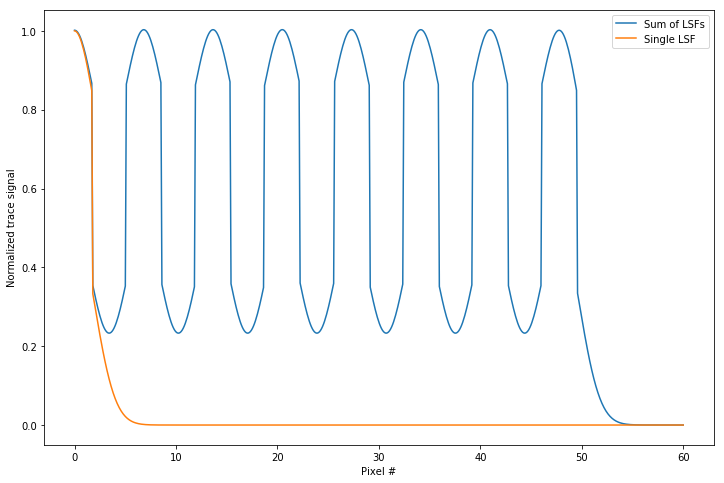

In [94]:

figure(figsize=(12,8))
x = linspace(0,60,600)
y = combine(x)
plot(x,y)
plot(x, lsf(x))
xlabel("Pixel #")
ylabel("Normalized trace signal")
legend(["Sum of LSFs", "Single LSF"])
show()



In [95]:
450/26.71

16.847622613253463

In [96]:
150/16.9

8.875739644970414